# **K Nearest Neighbors with Python**

You've been given a classified data set from a company! They've hidden the feature column names but have given you the data and the target classes. 

We'll try to use KNN to create a model that directly predicts a class for a new data point based off of the features.

Let's grab it and use it!

### Import Libraries



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Get the Data

Set index_col=0 to use the first column as the index.

In [3]:
df = pd.read_csv("Classified Data.txt",index_col=0)
df.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


## Data Exploration

In [ ]:
def explore_data(df):
 
    # Display basic information about the df
    print("Dataset Info:")
    print(df.info())
    print("\n")
    
    # Display summary statistics
    print("Summary Statistics:")
    display(df.describe())
    print("\n")
    
    # Check for missing values
    print("Missing Values:")
    print(df.isnull().sum())
    print("\n")
    
    # Check the distribution of the target variable
    if 'TARGET CLASS' in df.columns:
        print("Target Class Distribution:")
        print(df['TARGET CLASS'].value_counts())
        print("\n")
    
    # Plot pairplot for visualizing relationships (optional, for small datasets)
    # print("Generating pairplot (this may take time for large datasets)...")
    # sns.pairplot(df, hue='TARGET CLASS', diag_kind='kde')
    # plt.show()

In [10]:
# Exploring the dataset
explore_data(df)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   WTT           1000 non-null   float64
 1   PTI           1000 non-null   float64
 2   EQW           1000 non-null   float64
 3   SBI           1000 non-null   float64
 4   LQE           1000 non-null   float64
 5   QWG           1000 non-null   float64
 6   FDJ           1000 non-null   float64
 7   PJF           1000 non-null   float64
 8   HQE           1000 non-null   float64
 9   NXJ           1000 non-null   float64
 10  TARGET CLASS  1000 non-null   int64  
dtypes: float64(10), int64(1)
memory usage: 93.8 KB
None


Summary Statistics:


,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,0.949682,1.114303,0.834127,0.682099,1.032336,0.943534,0.963422,1.071960,1.158251,1.362725,0.50000
std,0.289635,0.257085,0.291554,0.229645,0.243413,0.256121,0.255118,0.288982,0.293738,0.204225,0.50025
min,0.174412,0.441398,0.170924,0.045027,0.315307,0.262389,0.295228,0.299476,0.365157,0.639693,0.00000
25%,0.742358,0.942071,0.615451,0.515010,0.870855,0.761064,0.784407,0.866306,0.934340,1.222623,0.00000
50%,0.940475,1.118486,0.813264,0.676835,1.035824,0.941502,0.945333,1.065500,1.165556,1.375368,0.50000
75%,1.163295,1.307904,1.028340,0.834317,1.198270,1.123060,1.134852,1.283156,1.383173,1.504832,1.00000
max,1.721779,1.833757,1.722725,1.634884,1.650050,1.666902,1.713342,1.785420,1.885690,1.893950,1.00000




Missing Values:
WTT             0
PTI             0
EQW             0
SBI             0
LQE             0
QWG             0
FDJ             0
PJF             0
HQE             0
NXJ             0
TARGET CLASS    0
dtype: int64


Target Class Distribution:
TARGET CLASS
1    500
0    500
Name: count, dtype: int64




### Data Visualization

In [13]:
def visualize_data(dataframe):
    
    # Check the distribution of numerical features
    print("Distribution of numerical features:")
    dataframe.hist(bins=20, figsize=(15, 10))
    plt.suptitle("Histograms of Numerical Features")
    plt.show()
    
    # Correlation heatmap
    print("Correlation Heatmap:")
    plt.figure(figsize=(12, 8))
    sns.heatmap(dataframe.corr(), annot=True, cmap='coolwarm', fmt=".2f")
    plt.title("Correlation Heatmap")
    plt.show()
    
    # Pairplot for relationships (optional for small datasets)
    # print("Generating pairplot (this may take time for large datasets)...")
    # sns.pairplot(dataframe, diag_kind='kde')
    # plt.show()
    
    # Boxplot for outlier detection
    print("Boxplot for numerical features:")
    plt.figure(figsize=(12, 8))
    sns.boxplot(data=dataframe, orient="h", palette="Set2")
    plt.title("Boxplot of Numerical Features")
    plt.show()

Distribution of numerical features:


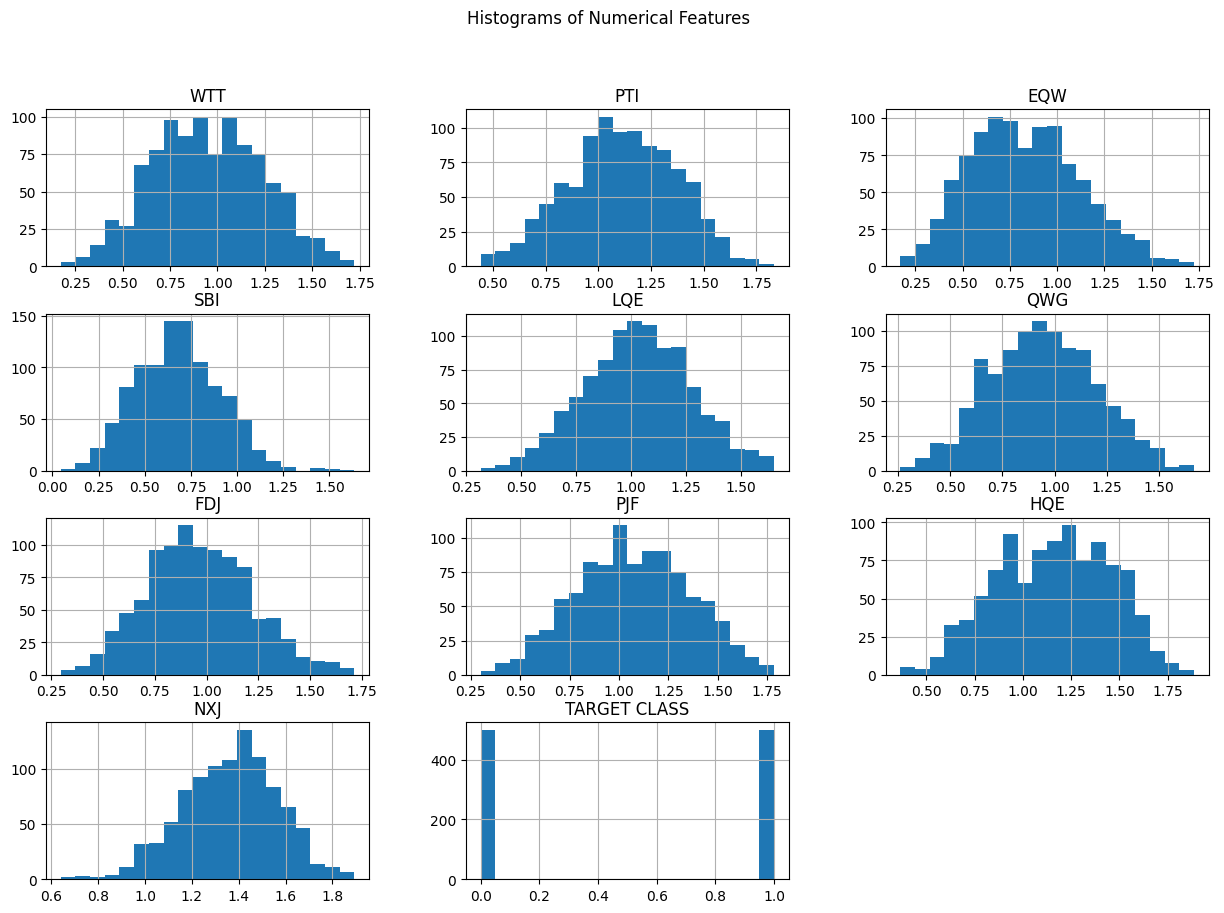

Correlation Heatmap:


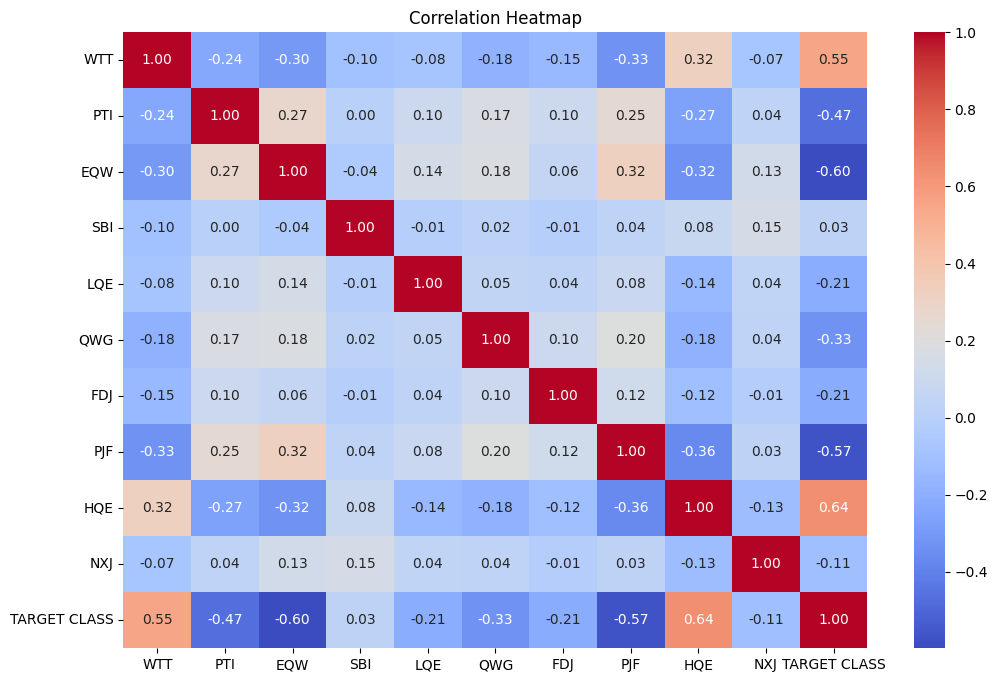

Boxplot for numerical features:


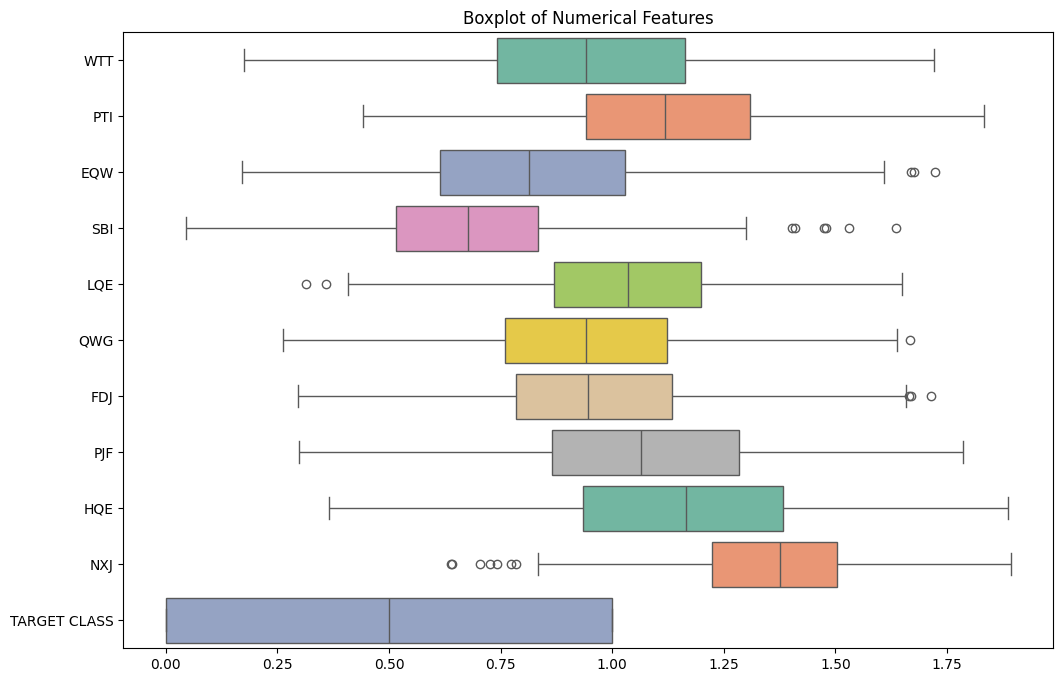

In [14]:
visualize_data(df)

## Data Preprocessing

In [17]:
# Splitting the data into X and y
X = df.drop('TARGET CLASS', axis=1)
y = df['TARGET CLASS']

### Standardize the Variables

- Because the KNN classifier predicts the class of a given test observation by identifying the observations that are nearest to it, the scale of the variables matters. 
- Any variables that are on a large scale will have a much larger effect on the distance between the observations, and hence on the KNN classifier, than variables that are on a small scale.

In [18]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_features = pd.DataFrame(X_scaled, columns=df.drop('TARGET CLASS', axis=1).columns)
X_features.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


### Train Test Split

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_features, y,
                                                    test_size=0.30, random_state=42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(700, 10)

(300, 10)

(700,)

(300,)

## Machine Learning
### Using KNN

- Remember that we are trying to come up with a model to predict whether someone will TARGET CLASS or not. 
- We'll start with k=1.

In [21]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn

KNeighborsClassifier(n_neighbors=1)

In [22]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=1)

In [23]:
knn_pred = knn.predict(X_test)
knn_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

## Predictions and Evaluations

Let's evaluate our KNN model!

Clssification Report 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       142
           1       0.95      0.93      0.94       158

    accuracy                           0.94       300
   macro avg       0.94      0.94      0.94       300
weighted avg       0.94      0.94      0.94       300



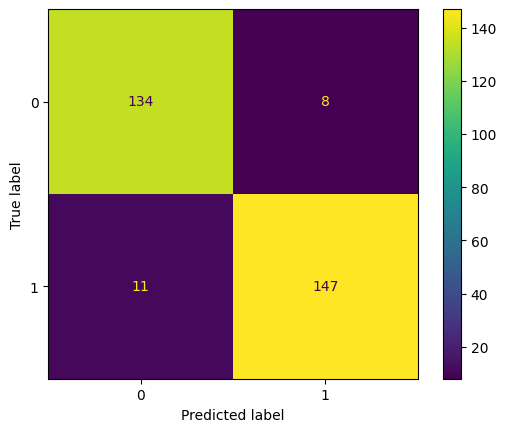

In [26]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Classification Report
cr = classification_report(y_test,knn_pred)
print('Clssification Report \n', cr)

# Confusion Matrix
cm = confusion_matrix(y_test, knn_pred)
cmd = ConfusionMatrixDisplay(cm, display_labels=knn.classes_)
cmd.plot()

## Choosing a K Value

Let's go ahead and use the elbow method to pick a good K Value:

In [45]:
error_rate = []

for i in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

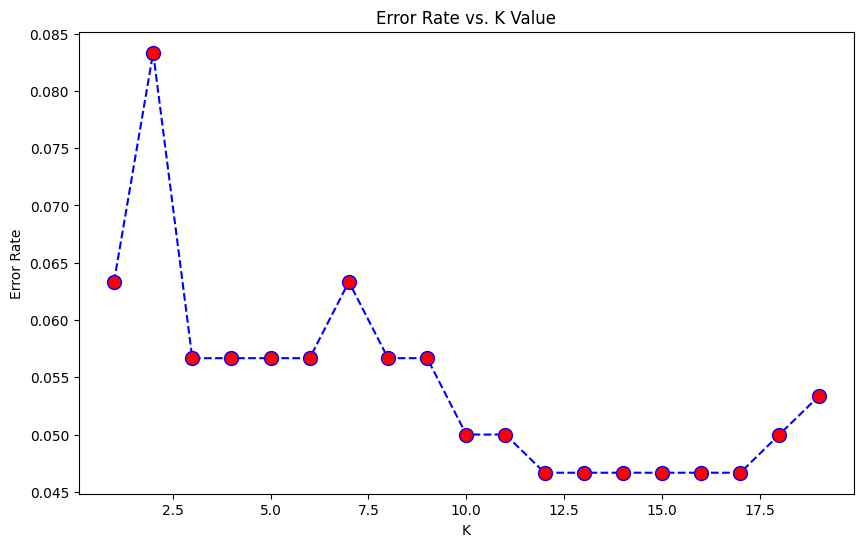

In [46]:
plt.figure(figsize=(10,6))
plt.plot(range(1,20), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

Here we can see that that after arouns K>23 the error rate just tends to hover around 0.06-0.05 Let's retrain the model with that and check the classification report!

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn23 = KNeighborsClassifier(n_neighbors=8)
knn23

KNeighborsClassifier(n_neighbors=8)

In [48]:
knn23.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=8)

In [49]:
knn23_pred = knn.predict(X_test)
knn23_pred

array([0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0])

Classification Report 
               precision    recall  f1-score   support

           0       0.94      0.95      0.94       142
           1       0.96      0.94      0.95       158

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



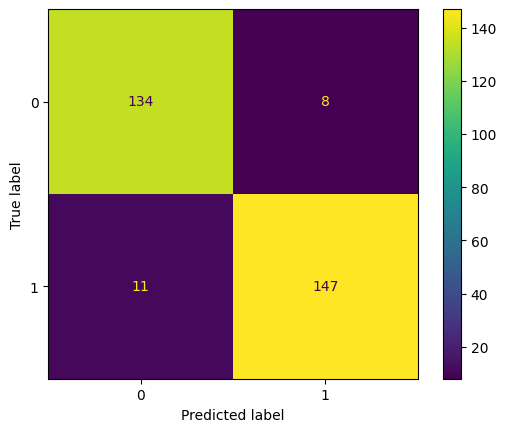

In [51]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
# Classification Report
cr23 = classification_report(y_test, knn23_pred)
print('Classification Report \n', cr23)

# Confusion Matrix
cm23 = confusion_matrix(y_test, knn23_pred)
cmd23 = ConfusionMatrixDisplay(cm, display_labels=knn23.classes_)
cmd23.plot()

### Combining Both to the dataframe

In [38]:
# Combine the predictions with the test data
test_data_with_predictions = X_test.copy()
test_data_with_predictions['Actual'] = y_test.values
test_data_with_predictions['KNN1'] = y_test.values
test_data_with_predictions['KNN23'] = knn23_pred

# Display the combined DataFrame
test_data_with_predictions.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,Actual,KNN1,KNN23
521,-0.840720,1.583438,1.018093,-1.214048,-0.557318,-0.108117,0.418539,0.495338,-0.407867,0.406975,0,0,0
737,1.381655,0.412642,-0.440155,0.576212,-1.489652,-1.060713,-0.849707,-1.839249,0.932394,-0.928714,1,1,1
740,1.268502,0.133668,0.717822,0.957695,-0.361608,0.645475,-2.549821,-0.904516,-0.422002,1.089682,1,1,1
660,0.911948,-0.433407,-1.315355,1.037253,-0.943751,-1.081542,-1.807654,0.573993,0.310824,-0.010354,1,1,1
411,-0.017284,0.739700,0.321345,-0.096414,-0.245185,0.692505,0.511209,-0.206656,-0.184316,2.460944,0,0,0


## Predictive System

In [41]:
new_data = np.random.rand(5, X_train.shape[1])

# Predict the target class for the new data
new_predictions = knn23.predict(new_data)

# Display the new data and their predictions
new_data_df = pd.DataFrame(new_data, columns=X_train.columns)
new_data_df['Predicted Class'] = new_predictions
new_data_df

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,Predicted Class
0,0.478471,0.126513,0.437890,0.272407,0.871478,0.385531,0.564271,0.019608,0.370917,0.616882,1
1,0.164543,0.780795,0.769588,0.855305,0.052485,0.597361,0.394849,0.049876,0.916612,0.328420,1
2,0.653161,0.471925,0.803279,0.611438,0.856109,0.122188,0.518308,0.481789,0.358171,0.599693,0
3,0.090083,0.506112,0.884198,0.124748,0.568142,0.132633,0.225105,0.452465,0.381201,0.391559,0
4,0.861746,0.308143,0.768132,0.127854,0.608644,0.111834,0.143465,0.001326,0.494916,0.993421,1
